In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Model, model_from_json
import matplotlib.pyplot as plt

In [2]:
def autoencoder():
    latent_dim = 512
    
    image_input = keras.Input(shape = (128,128,3), name = 'image_input')
    func_input = keras.Input(shape = (1,1), name = 'AU_input')
    
    x = layers.Conv2D(filters=32, kernel_size=5, strides=(2,2), padding='same')(image_input)
    x = layers.LeakyReLU()(x)
    
    x = layers.Conv2D(filters=64, kernel_size=5, strides=(2,2), padding='same')(x)
    x = layers.LeakyReLU()(x)
    
    x = layers.Conv2D(filters=128, kernel_size=5, strides=(2,2), padding='same')(x)
    x = layers.LeakyReLU()(x)
    
    x = layers.Conv2D(filters=256, kernel_size=5, strides=(2,2), padding='same')(x)
    
    x = layers.LeakyReLU()(x)
    x = layers.Flatten()(x)
    
    img_encoded = layers.Dense(2*latent_dim, name = 'encoded_image')(x)
    flattened_au = layers.Flatten()(func_input)
    combined_input = layers.concatenate([img_encoded, flattened_au])


    x = layers.Dense(4096)(combined_input)
    x = layers.Dense(4096)(x)
    x = layers.Dense(16384)(x)
    x = layers.Reshape((8,8,256))(x)
    x = layers.Conv2DTranspose(filters=256, kernel_size=5, strides=(2,2), padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2DTranspose(filters=128, kernel_size=5, strides=(2,2), padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2DTranspose(filters=64, kernel_size=5, strides=(2,2), padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2DTranspose(filters=32, kernel_size=5, strides=(2,2), padding='same')(x)
    x = layers.LeakyReLU()(x)

    output_img= layers.Conv2DTranspose(filters = 3, kernel_size =5, strides= (1,1), padding = 'same', name = 'output_image')(x)
    
    x = layers.Conv2D(filters=32, kernel_size=5, strides=(2,2), padding='same')(output_img)
    x = layers.LeakyReLU()(x)
    
    x = layers.Conv2D(filters=64, kernel_size=5, strides=(2,2), padding='same')(x)
    x = layers.LeakyReLU()(x)
    
    x = layers.Conv2D(filters=128, kernel_size=5, strides=(2,2), padding='same')(x)
    x = layers.LeakyReLU()(x)

    x = layers.Flatten()(x)
    smile = layers.Dense(1, activation = 'softmax' , name= 'smile_identifier')(x)
    
    model_AE = keras.Model(inputs = [image_input, func_input], outputs = [output_img, smile])



    return model_AE

In [3]:
modelAE = autoencoder()

In [4]:
modelAE.load_weights('autoE_weights')

In [5]:
def display(image):
    
    
    fact = []

    for i in range(-10,10):
        fact.append(i)
    
    img_arr = []
    for i in range(20):
        img_arr.append(image)
    
    img_arr = np.array(img_arr)
    
    fact = np.array(fact)
    
    au = np.array(fact).reshape(-1,1,1)
    image = np.array(img_arr).reshape(-1,128,128,3)
    
    img, x = modelAE.predict([image, au])
    
    plt.figure(figsize=(10,10))

    for i in range(20):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        #imx = np.array(img[i]).reshape(128,128,3)
        plt.imshow(cv2.cvtColor(np.array(img[i]), cv2.COLOR_BGR2RGB))
    plt.show()
    
    return 0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

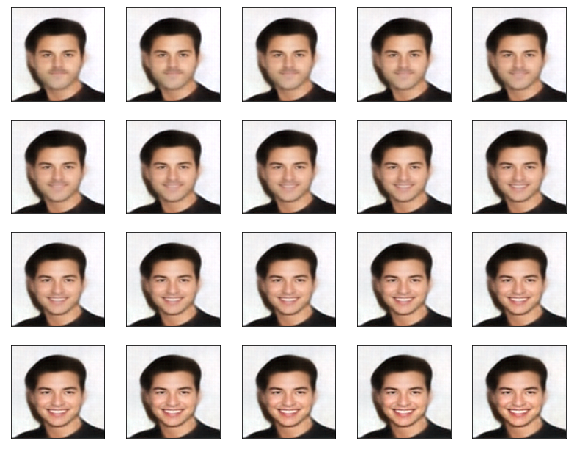

In [6]:
image = cv2.imread('image1.jpg')/255.0
x = display(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


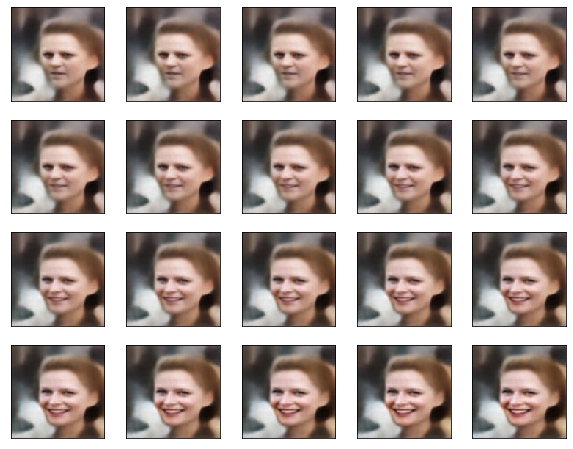

In [7]:
image = cv2.imread('image2.jpg')/255.0
x = display(image)